<a href="https://colab.research.google.com/github/phycem/Finance-Machine-Learning-Applications/blob/main/Option_pricing_using_Black_Scholes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# the finite difference method used, which involves setting up a grid of points.

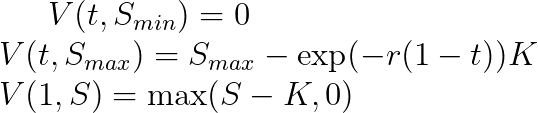

In [33]:
def bottom_boundary_condition(K,T,S_min, r, t):
    print(S.shape)
    return np.maximum(S-K,0)

In [34]:
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def final_boundary_condition(K,T,S_min, r, t):
    return np.zeros(t.shape)
def top_boundary_condition(K,T,S_max, r, t):
    return S_max-np.exp(-r*(T-t))*K
def bottom_boundary_condition(K,T,S_min, r, t):
    print(S.shape)
    return np.maximum(S-K,0)




In [35]:
def compute_abc( K, T, sigma, r, S, dt, dS ):
    a = -sigma**2 * S**2/(2* dS**2 ) + r*S/(2*dS)
    b = r + sigma**2 * S**2/(dS**2)
    c = -sigma**2 * S**2/(2* dS**2 ) - r*S/(2*dS)
    return a,b,c
def compute_lambda( a,b,c ):
    return scipy.sparse.diags( [a[1:],b,c[:-1]],offsets=[-1,0,1])
def compute_W(a,b,c, V0, VM): 
    M = len(b)+1
    W = np.zeros(M-1)
    W[0] = a[0]*V0 
    W[-1] = c[-1]*VM 
    return W

In [36]:
def price_call_explicit( K, T, r, sigma, N, M):
    # Choose the shape of the grid
    dt = T/N
    S_min=0
    S_max=K*np.exp(8*sigma*np.sqrt(T))
    dS = (S_max-S_min)/M
    S = np.linspace(S_min,S_max,M+1)
    t = np.linspace(0,T,N+1)
    V = np.zeros((N+1,M+1)) #...
    
    # Set the boundary conditions
    V[:,-1] = top_boundary_condition(K,T,S_max,r,t)
    V[:,0] = bottom_boundary_condition(K,T,S_max,r,t)
    V[-1,:] = final_boundary_condition(K,T,S) #...
    
    # Apply the recurrence relation
    a,b,c = compute_abc(K,T,sigma,r,S[1:-1],dt,dS)
    Lambda =compute_lambda( a,b,c) 
    identity = scipy.sparse.identity(M-1)
    
    for i in range(N,0,-1):
        W = compute_W(a,b,c,V[i,0],V[i,M])
        # Use `dot` to multiply a vector by a sparse matrix
        V[i-1,1:M] = (identity-Lambda*dt).dot( V[i,1:M] ) - W*dt
        
    return V, t, S




In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

K = 100
T = 1
r = 0.05
sigma = 0.2
N = 1000
M = 100
S_min=0
S_max=K*np.exp(8*sigma*np.sqrt(T))
dS = (S_max-S_min)/M
S = np.linspace(S_min,S_max,M+1)
t = np.linspace(0,T,N+1)
V = np.zeros((N+1,M+1)) #...

V, t, S = price_call_explicit(K, T, r, sigma, N, M)

# Create a 3D plot of V with t and S as the axes
fig = plt.figure()
ax = fig.gca(projection='3d')
T, S = np.meshgrid(t, S)
ax.plot_surface(T, S, V.T)
ax.set_xlabel('Time')
ax.set_ylabel('Stock Price')
ax.set_zlabel('Option Price')
plt.show()


(101,)


ValueError: ignored

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

K = 100
T = 1
r = 0.05
sigma = 0.2
N = 1000
M = 100

V, t, S = price_call_explicit(K, T, r, sigma, N, M)

# Create a 3D plot of V with t and S as the axes
fig = plt.figure()
ax = fig.gca(projection='3d')
T, S = np.meshgrid(t, S)
ax.plot_surface(T, S, V.T)
ax.set_xlabel('Time')
ax.set_ylabel('Stock Price')
ax.set_zlabel('Option Price')
plt.show()


NameError: ignored

https://towardsdatascience.com/option-pricing-using-the-black-scholes-model-without-the-formula-e5c002771e2f